In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 99

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
X_train

array([[ 0.        ,  0.        , -0.1312336 , ..., -0.27559054,
         0.09711286, -0.2152231 ],
       [ 0.        ,  0.        , -0.12189616, ..., -0.39954853,
         0.08577878, -0.32731378],
       [ 0.        ,  0.        , -0.08682635, ...,  0.03293413,
        -0.39221558,  0.01197605],
       ...,
       [ 0.        ,  0.        , -0.07615894, ..., -0.00331126,
        -0.80794704, -0.04635762],
       [ 0.        ,  0.        , -0.35      , ..., -0.6142857 ,
         0.02857143, -0.53571427],
       [ 0.        ,  0.        , -0.10555556, ..., -0.16666667,
         0.175     , -0.1       ]], dtype=float32)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 99)                1089      
                                                                 
Total params: 2,159
Trainable params: 2,159
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
36/38 [===========================>..] - ETA: 0s - loss: 4.4095 - accuracy: 0.0853
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 4s 12ms/step - loss: 4.4012 - accuracy: 0.0855 - val_loss: 4.1366 - val_accuracy: 0.0805
Epoch 2/1000
31/38 [=======================>......] - ETA: 0s - loss: 3.6787 - accuracy: 0.1358
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 9ms/step - loss: 3.5700 - accuracy: 0.1394 - val_loss: 2.8108 - val_accuracy: 0.1799
Epoch 3/1000
34/38 [=========================>....] - ETA: 0s - loss: 2.5656 - accuracy: 0.2024
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 10ms/step - loss: 2.5413 - accuracy: 0.2027 - val_loss: 2.0557 - val_accuracy: 0.2937
Epoch 4/1000
30/38 [======================>.......] - ETA: 0s - loss: 2.1318 - accuracy: 0.2193

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 9ms/step - loss: 0.2692 - accuracy: 0.9503


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.46131569e-08 1.08109632e-09 5.98129484e-23 3.06903851e-12
 4.18145407e-10 2.81399681e-10 9.03859176e-03 6.44657342e-03
 2.41130590e-03 9.79299486e-01 2.80397711e-03 7.48443441e-18
 1.28685401e-20 1.24821193e-23 1.58546209e-20 3.04187255e-25
 1.71563358e-21 1.56300230e-21 3.83027437e-21 9.18823657e-23
 9.54463635e-23 2.09875194e-22 1.39358317e-20 4.67543889e-21
 8.20178920e-24 3.95199593e-21 4.74632893e-22 4.02319503e-23
 1.24355252e-18 4.04273740e-21 5.11515012e-25 5.98556290e-23
 1.53244367e-21 9.49152756e-21 1.85748344e-23 1.20119585e-22
 7.85947484e-23 2.37656664e-21 3.59224209e-22 1.61192228e-21
 4.02727034e-20 6.57656360e-23 6.35191748e-23 6.14243704e-23
 4.41381636e-22 4.54473861e-25 4.13384092e-22 1.53926912e-21
 2.17134469e-23 1.63940008e-21 4.91222855e-20 1.74573732e-22
 2.52906724e-23 1.05118044e-22 5.42682988e-22 9.53085337e-22
 2.72239882e-21 1.59370209e-21 5.07271641e-23 1.37781504e-20
 1.52760000e-20 6.06208480e-22 3.56182881e-21 4.48061792e-24
 9.90968205e-23 5.541236

# Confusion matrix

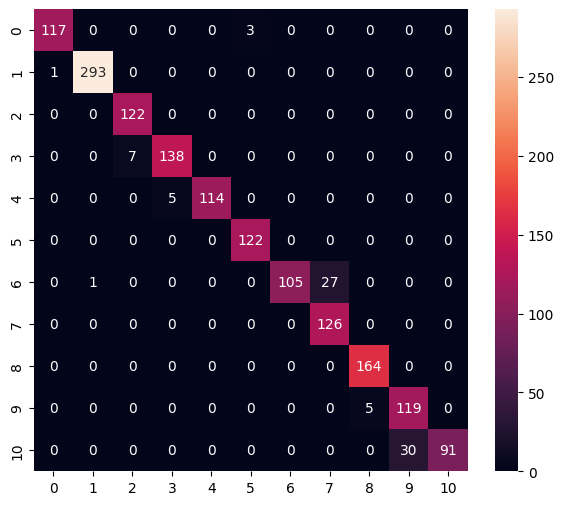

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       120
           1       1.00      1.00      1.00       294
           2       0.95      1.00      0.97       122
           3       0.97      0.95      0.96       145
           4       1.00      0.96      0.98       119
           5       0.98      1.00      0.99       122
           6       1.00      0.79      0.88       133
           7       0.82      1.00      0.90       126
           8       0.97      1.00      0.98       164
           9       0.80      0.96      0.87       124
          10       1.00      0.75      0.86       121

    accuracy                           0.95      1590
   macro avg       0.95      0.94      0.94      1590
weighted avg       0.96      0.95      0.95      1590



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\crsho\AppData\Local\Temp\tmp4vzwzx_d\assets


10456

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.46131569e-08 1.08109410e-09 5.98129421e-23 3.06904979e-12
 4.18146184e-10 2.81399126e-10 9.03858151e-03 6.44656084e-03
 2.41130590e-03 9.79299486e-01 2.80397991e-03 7.48443441e-18
 1.28685409e-20 1.24821185e-23 1.58546209e-20 3.04187280e-25
 1.71563338e-21 1.56300815e-21 3.83027396e-21 9.18827002e-23
 9.54463635e-23 2.09875207e-22 1.39358834e-20 4.67543848e-21
 8.20178920e-24 3.95201088e-21 4.74631076e-22 4.02319503e-23
 1.24355273e-18 4.04273740e-21 5.11515062e-25 5.98556227e-23
 1.53243771e-21 9.49149121e-21 1.85748328e-23 1.20119572e-22
 7.85947547e-23 2.37656644e-21 3.59224184e-22 1.61192228e-21
 4.02727034e-20 6.57653836e-23 6.35191684e-23 6.14243704e-23
 4.41381586e-22 4.54475537e-25 4.13384092e-22 1.53926912e-21
 2.17133617e-23 1.63940008e-21 4.91222822e-20 1.74573707e-22
 2.52907702e-23 1.05118044e-22 5.42682988e-22 9.53085135e-22
 2.72239862e-21 1.59370199e-21 5.07269716e-23 1.37780970e-20
 1.52759984e-20 6.06208581e-22 3.56184214e-21 4.48061792e-24
 9.90964355e-23 5.541237

In [24]:
999

999